### Customer Acquisition Cost (CAC) Definition:
-   Customer Acquisition Cost (CAC) measures the total marketing spend to acquire one new customer. It's calculated as:
    
        CAC = Total Marketing Speand / Number of New Customers Acquired

-   **Customer Acquisition Cost** measures the efficiency of marketing spend by revealing the cost to acquire each customer. It directly informs profitability (when paired with customer lifetime value), highlights high-performing channels for budget scaling (e.g., low-CAC email campaigns), and flags inefficiencies needing optimization (e.g., overpriced online ads). By tracking CAC, companies allocate resources strategically, avoid unsustainable growth, and ensure their customer acquisition model supports long-term revenue.  



-   We will analyze:

    -   Which marketing channels are most cost-effective.
    -   Relationship between spend and new customers acquired.
    -   Visualize trends and insights.
    -   Calculate CAC per channel.
    -   Recommend best-performing channels.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"C:\Users\emper\OneDrive\Desktop\Customer Acquisition Cost Analysis\cac.csv")

df.head()


,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers
0,CUST0001,Email Marketing,3489.027844,16
1,CUST0002,Online Ads,1107.865808,33
2,CUST0003,Social Media,2576.081025,44
3,CUST0004,Online Ads,3257.567932,32
4,CUST0005,Email Marketing,1108.408185,13


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        500 non-null    object 
 1   Marketing_Channel  500 non-null    object 
 2   Marketing_Spend    500 non-null    float64
 3   New_Customers      500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [3]:
# Creating a new column for Customer Acquisition Cost (CAC)
df['CAC'] = df['Marketing_Spend']/ df['New_Customers']
# Creating a new column for Conversion Rate
df['Conversion_Rate'] = df['New_Customers'] / df['Marketing_Spend'] * 100

df.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,CAC,Conversion_Rate
0,CUST0001,Email Marketing,3489.027844,16,218.064240,0.458580
1,CUST0002,Online Ads,1107.865808,33,33.571691,2.978700
2,CUST0003,Social Media,2576.081025,44,58.547296,1.708021
3,CUST0004,Online Ads,3257.567932,32,101.798998,0.982328
4,CUST0005,Email Marketing,1108.408185,13,85.262168,1.172853


### **Customer Acquisition Cost**

-   Now, let's have a look at Average CAC by marketing channel:

In [4]:
df_cac = df.groupby('Marketing_Channel')['CAC'].mean().reset_index()
df_cac = df_cac.sort_values(by='CAC', ascending=False)
df_cac

,Marketing_Channel,CAC
0,Email Marketing,132.913758
3,Social Media,126.181913
1,Online Ads,122.135938
2,Referral,119.892174


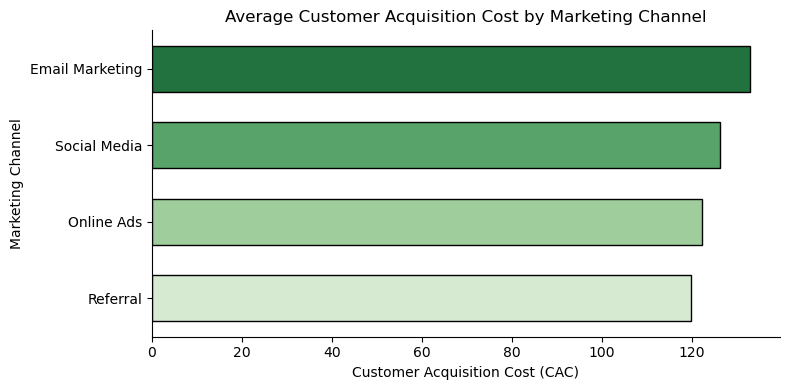

In [5]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_cac,
    y='Marketing_Channel',
    x='CAC',
    palette='Greens_r',
    edgecolor='black',
    width=0.6

)

plt.title('Average Customer Acquisition Cost by Marketing Channel')
plt.ylabel('Marketing Channel')
plt.xlabel('Customer Acquisition Cost (CAC)')

sns.despine()
plt.tight_layout()
plt.show()

*   **Key Insights:**
    - **Email Marketing** has the highest average CAC, indicating it is the most expensive channel per customer acquired.

    - **Social Media** follows closely with a slightly lower CAC compared to Email Marketing.

    - **Online Ads** and **Referral** have significantly lower CACs, making them more cost-effective channels for acquiring customers.

    - Referral stands out as the most efficient channel, with the lowest average CAC among all marketing channels.
_______

-   Now, Let's visualize how much was spent vs how many customers were acquired per campain.

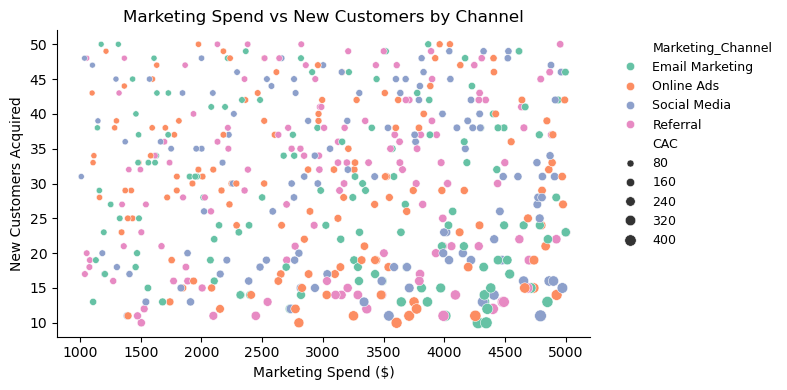

In [8]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df,
    x='Marketing_Spend',
    y='New_Customers',
    hue='Marketing_Channel',
    size='CAC',
    palette='Set2',
)
plt.title('Marketing Spend vs New Customers by Channel')
plt.xlabel('Marketing Spend ($)')
plt.ylabel('New Customers Acquired')
plt.legend(fontsize=9, bbox_to_anchor=(1.03, 1), loc='upper left', frameon=False)


sns.despine()
plt.tight_layout()
plt.show()

- **Email Marketing**: Shows a moderate correlation between marketing spend and new customers acquired. Higher spends generally lead to more customers, but there is some variability.
- **Online Ads**: Displays a relatively strong positive correlation between marketing spend and new customers acquired. As spending increases, the number of new customers tends to increase significantly.
- **Social Media**: Exhibits a moderate relationship between marketing spend and new customers. While higher spends do result in more customers, the trend is less pronounced compared to Online Ads.
- **Referral**: Demonstrates a weaker correlation between marketing spend and new customers acquired. The spread of data points suggests that referral campaigns may not be as directly influenced by marketing spend as other channels.
- **CAC (Customer Acquisition Cost)**: The size of the bubbles indicates CAC, with larger bubbles representing higher costs per customer. Referral has the largest bubbles, suggesting it has the highest CAC among the channels. Email Marketing and Social Media have medium-sized bubbles, while Online Ads shows smaller bubbles, indicating lower CAC.

#### Key Observations:
1. **Efficiency**: Online Ads appears to be the most efficient channel in terms of acquiring new customers per dollar spent, as indicated by its stronger correlation and lower CAC.
2. **Variability**: Referral shows high variability in both marketing spend and new customers acquired, which could indicate inconsistent performance or different campaign strategies.
3. **Cost Efficiency**: Email Marketing and Social Media fall in the middle, balancing cost and acquisition effectiveness. They offer moderate returns on investment.
4. **High CAC**: Referral has the highest CAC, meaning it costs more to acquire each customer compared to other channels.

______

-   Now, let’s have a look at the relationship between new customers acquired and CAC:

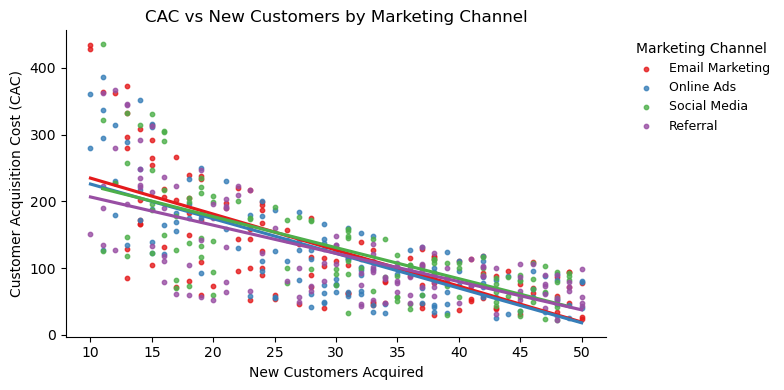

In [9]:
# creating linear regression plots for CAC vs New Customers by Marketing Channel
sns.lmplot(
    data=df,
    x='New_Customers',
    y='CAC',
    hue='Marketing_Channel',
    ci=None,                  
    markers='o',
    scatter_kws={"s": 10},              
    palette='Set1',
    legend=False,
    height=4,
    aspect=2,
)

plt.title("CAC vs New Customers by Marketing Channel")
plt.xlabel('New Customers Acquired')
plt.ylabel('Customer Acquisition Cost (CAC)')
plt.legend(title='Marketing Channel', fontsize=9, bbox_to_anchor=(1.03, 1), loc='upper left', frameon=False)


sns.despine()
plt.tight_layout()
plt.show()

- **Overall Trend**: There is a general **negative correlation** between Customer Acquisition Cost (CAC) and the number of new customers acquired across all marketing channels. As the number of new customers increases, the CAC tends to decrease.
  
- **Channel Performance**:
  - **Email Marketing**: Shows a relatively steep decline in CAC as the number of new customers increases. This suggests that Email Marketing becomes more cost-effective with scale.
  - **Online Ads**: Exhibits a moderate decline in CAC with increasing customer acquisition. It performs reasonably well but not as efficiently as Email Marketing.
  - **Social Media**: Displays a gradual decline in CAC, indicating consistent performance but with less pronounced efficiency gains compared to other channels.
  - **Referral**: Maintains a relatively flat trend with low CAC values even at lower customer acquisition numbers. This suggests that Referral is consistently efficient, regardless of scale.

- **Efficiency Across Channels**:
  - **Referral** stands out as the most efficient channel overall, with consistently low CAC across different customer acquisition levels.
  - **Email Marketing** shows strong scalability, becoming increasingly efficient as it acquires more customers.
  - **Online Ads** and **Social Media** are moderately efficient, with diminishing returns as customer acquisition increases.

#### Key Observations:
1. **Referral Dominance**: Referral consistently has the lowest CAC, making it the most cost-effective channel.
2. **Scalability of Email Marketing**: Email Marketing improves significantly in efficiency as it scales, suggesting it may benefit from larger budgets.
3. **Moderate Efficiency of Online Ads and Social Media**: While these channels are effective, they do not show as much improvement in efficiency with increased customer acquisition compared to Email Marketing.
4. **Potential Optimization Opportunities**: Campaigns with high CAC (outliers) should be reviewed for optimization or reallocation of budget.

___________________